<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Clustering_Part_2_Agglomerative_clustering_on_Fromages_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering  
Clustering / Segmentation of 'fromages' with `scikit-learn` and `scipy`.  
---

## Objectives


Understand one of the main clustering algorithms and be ready for praticing.  
Practice hierarchical clustering to make clusters with 'fromages' dataset.

## 1.Librairies

In [ ]:
# Libraries for data & dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Module for K-means algorithm
from sklearn.cluster import AgglomerativeClustering

## 2.Data

In [ ]:
url = "https://raw.githubusercontent.com/remijul/dataset/master/fromages.txt"
df = pd.read_csv(url, delimiter = "\t", index_col=0)
df.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


First exploration and description.

**All together :**

In [ ]:
print(df)

                    calories  sodium  calcium  lipides  retinol  folates  \
Fromages                                                                   
CarredelEst              314   353.5     72.6     26.3     51.6     30.3   
Babybel                  314   238.0    209.8     25.1     63.7      6.4   
Beaufort                 401   112.0    259.4     33.3     54.9      1.2   
Bleu                     342   336.0    211.1     28.9     37.1     27.5   
Camembert                264   314.0    215.9     19.5    103.0     36.4   
Cantal                   367   256.0    264.0     28.8     48.8      5.7   
Chabichou                344   192.0     87.2     27.9     90.1     36.3   
Chaource                 292   276.0    132.9     25.4    116.4     32.5   
Cheddar                  406   172.0    182.3     32.5     76.4      4.9   
Comte                    399    92.0    220.5     32.4     55.9      1.3   
Coulomniers              308   222.0     79.2     25.6     63.6     21.1   
Edam        

**Description :**

In [ ]:
df.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


**Features names :**

In [ ]:
print(df.columns)

Index(['calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates',
       'proteines', 'cholesterol', 'magnesium'],
      dtype='object')


## 3.Hierarchical clustering
`Agglomerative Clustering` is the provided class from sklearn for recursively merges pair of clusters of sample data; uses linkage distance.  
See [sklearn Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

###3.1 Compute clustering

In [ ]:
hc = AgglomerativeClustering(compute_distances=True).fit(df)
hc

AgglomerativeClustering(compute_distances=True)

Get the number of clusters found by the algorithm (`n_clusters=2` is the default)

In [ ]:
hc.n_clusters_

2

Get the cluster labels for each point.

In [ ]:
hc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1])

Get the number of leaves in the hierarchical tree.

In [ ]:
hc.n_leaves_

29

Get the estimated number of connected components in the graph.

In [ ]:
hc.n_connected_components_

1

Get the number of features seen during fit.

In [ ]:
hc.n_features_in_

9

Get the names of features seen during fit.

In [ ]:
hc.feature_names_in_

array(['calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates',
       'proteines', 'cholesterol', 'magnesium'], dtype=object)

Get the children of each non-leaf node.

In [ ]:
hc.children_

array([[16, 20],
       [17, 18],
       [ 1, 23],
       [ 2,  9],
       [21, 26],
       [ 3, 30],
       [11, 27],
       [ 6, 10],
       [22, 31],
       [25, 35],
       [ 5, 19],
       [15, 28],
       [ 7, 33],
       [14, 24],
       [12, 32],
       [37, 41],
       [ 4, 34],
       [ 0, 42],
       [ 8, 38],
       [36, 44],
       [29, 40],
       [39, 47],
       [45, 46],
       [13, 48],
       [43, 50],
       [51, 52],
       [53, 54],
       [49, 55]])

And finally, get the distances between nodes in the corresponding place in `children_`.

In [ ]:
hc.distances_

array([ 33.64119498,  37.47452468,  38.02841043,  45.00877692,
        49.66356814,  58.4642911 ,  59.83895053,  61.06209954,
        70.17045912,  80.84746955,  87.48159806,  88.28833445,
        90.54197921,  94.70348462,  96.77015725, 112.88916393,
       127.57537641, 135.11430963, 147.18239252, 167.84122209,
       168.68274956, 182.17390044, 219.67433797, 236.78176251,
       238.93372628, 356.96703351, 571.05871599, 825.48803759])

###3.2 Plot the dendogram
Dendogram's plot is not a implemented in sklearn.  
Howerver `scipy` offers the possibility to plot dendogram thanks to the `cluster.hierarchy` module.  
See [scipy - cluster.hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram) documentation.

In [ ]:
import scipy.cluster.hierarchy as shc

First, compute again the linkage matrix (distances).

In [ ]:
linkage_matrix = shc.linkage(df, method='ward')
linkage_matrix

array([[ 16.        ,  20.        ,  33.64119498,   2.        ],
       [ 17.        ,  18.        ,  37.47452468,   2.        ],
       [  1.        ,  23.        ,  38.02841043,   2.        ],
       [  2.        ,   9.        ,  45.00877692,   2.        ],
       [ 21.        ,  26.        ,  49.66356814,   2.        ],
       [  3.        ,  30.        ,  58.4642911 ,   3.        ],
       [ 11.        ,  27.        ,  59.83895053,   2.        ],
       [  6.        ,  10.        ,  61.06209954,   2.        ],
       [ 22.        ,  31.        ,  70.17045912,   3.        ],
       [ 25.        ,  35.        ,  80.84746955,   3.        ],
       [  5.        ,  19.        ,  87.48159806,   2.        ],
       [ 15.        ,  28.        ,  88.28833445,   2.        ],
       [  7.        ,  33.        ,  90.54197921,   3.        ],
       [ 14.        ,  24.        ,  94.70348462,   2.        ],
       [ 12.        ,  32.        ,  96.77015725,   3.        ],
       [ 37.        ,  41

**What kind of interpretation of this matrix ?**

Then, plot the dendogram.

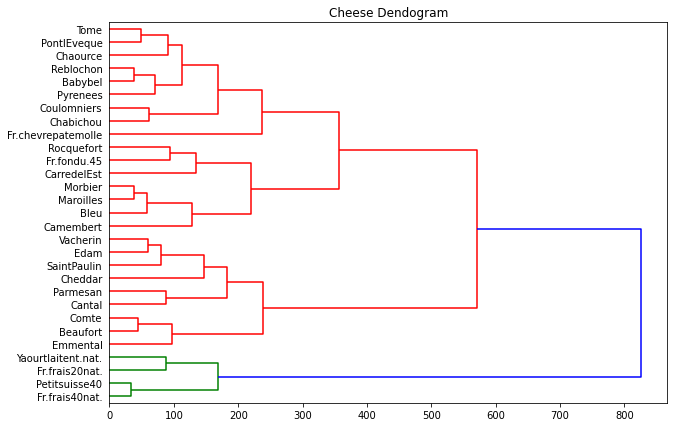

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Cheese Dendogram")
dend = shc.dendrogram(linkage_matrix, labels=df.index, orientation='right')

**How many clusters for optimal partition ?**  
**Are you agree with the choice of 2 clusters ?**  
**What kind of interpretation of this matrix ?**

###3.3 Plot the dendogram & correlation matrix
From this [ressource](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/td2a_correction_session_3A.html), dendogram and correlation matrix might associated for better understanding.

Text(0.5, 1.0, 'Correlation matrix & Dendogram')

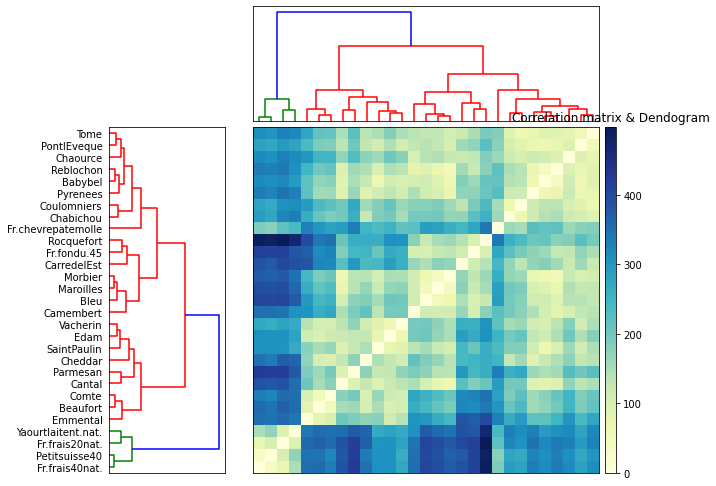

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

data_dist = pdist(df)

fig = plt.figure(figsize=(8,8))

# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Z1 = dendrogram(linkage_matrix, orientation='right',labels=list(df.index))
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(linkage_matrix)
ax2.set_xticks([])
ax2.set_yticks([])

# Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']

D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.title("Correlation matrix & Dendogram")

## 4.Conclusions
Hierarchical clustering offers somes pros and cons as many other ML algorithm. 
* pros: allow to sum up the data, dedicated for small-medium data sets.
* cons: computationally demanding, fails on larger data sets.
